# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
* No, the Smartcab is not moving during the simulation.
* The agent receives a negative reward if it is idle on a green ligth, and a positive reward if it is idle on a red light. This baseline agent is not moving at all so these are the only kinds of rewards it is getting. Looks like the agent is only enforced to meet safety creteria. 
* The light changing color affects how the actions of the agent are perceived in terms of utility. It needs to move to the destination when it sees a green light, so being idle results in a negative reward, and, in opposite, being idle on a red light results in a positive reward. However, the actions do not depend only on a light color as the agent may still move on a red light and must be idle on a green light if certain conditions regarding other agents in the world are satisfied and certain driving rules are considered. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
* **update_delay** flag is responsible for the speed of GUI update, smaller values will make the simulation faster, bigger values will make it slower. **num_dummies** flag is the number of other agents in the world, it affects the behaviors of the Smartcab as the more agents the world has the harder it gets to complete a trip on time without any violations. **learning** flag enforced the agent to learn the optimal behavior and not just use previously learned (or baseline) tactics. 
* It cals *Environment.act()* function.
* *render_text()* allows to use only command line, it displays only text information about agent's actions, while *render()* function uses visual representation (GUI). The desired behavior can be choosen by setting **display** flag in *agent.py* (by default it is True).
* *next_waypoint()* function considers East-West direction first 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


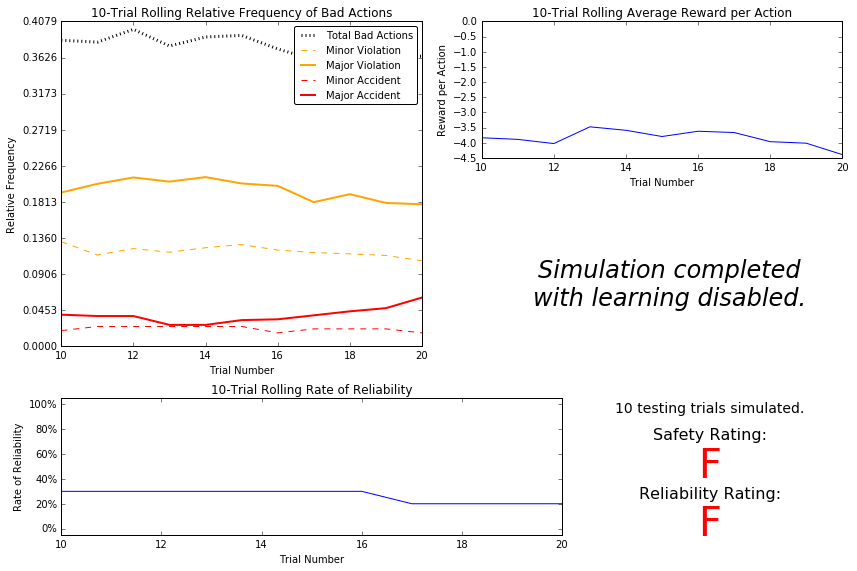

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The visualisation above describes a world where the Smartcab behaves randomly. It definitely would not be considered neither safe nor reliable for its passengers as it received the worst possible rating (F) for both metrics. The agent was able to complete on time only about ~ 20% of all trips (Rolling Rate of Reliabiity) and produced a lot of acidents and violations. Agent's bad decisions (~40% in total) mostly caused major violations (~20%) like moving forward on a red light and minor violations (~12%) like being idle on a green light. Therefore, accidents take the rest (~8%) with  ~5% for major accidents (like moving forward on a red light and ignoring traffic which goes forward from agent's left or right) and ~3% for minor accidents (like moving right on a red light and ignoring traffic which goes forward from agent's left). The panel for Rolling average reward per action shows the the average reward was about -4, so the agent was penalized heavily for its bad actions.

The reliability rate is definitelly makes sense as the agent takes its actions randomly, therefore, those 20% of completed trips are produced only by chance. The more trials we will run the closer the reliability rate will be to it's true analytical value (in a world where the agent takes only random actions with the same initial setup like number of intersection and number of dummy agents).

This is a baseline agents, which behaves randomly and does not learn from it's mistakes so as the number of trials increases, the outcome stays approximately the same and shows similar results for all trials.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

In order to answer this question let us review the driving rules. When the light is red, a driver cannot move forward or turning left, however, he can turn right only if there is nobody on his left or a car in his left is not moving, so *information about the Smartcab’s left side matters*. When the light is green, a driver can turn right or move forward, however, he can turn left only after oncoming traffic has passed or there is no oncoming traffic, so *information about oncoming cars matters*. We can see the information about right side is not important to learn safety nor efficiency, so I will exclude this feature from learning. 

*Waypoint* helps to split the route into understandable and manageble chunks, this feature will help the agent to learn efficiency. *Deadline* also can help to learn efficiency, however, it is redundant in the presence of *waypoint* and has more possible options which will make the larning harder, so I will exclude it from learning.

To sum up, for modelling I am going to use *light*, *left* and *oncoming* sensor inputs and *waypoint*.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

*Oncoming* and *Left* have 4 possible options: turning left, turning right, moving forward, or there may be no cars. *Light* can be red or green, while *waypoint* determines intented direction of our agent: left, right or forward. So there are 96 possible combinations, and, therefore, 96 possible states in which the agent can be.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

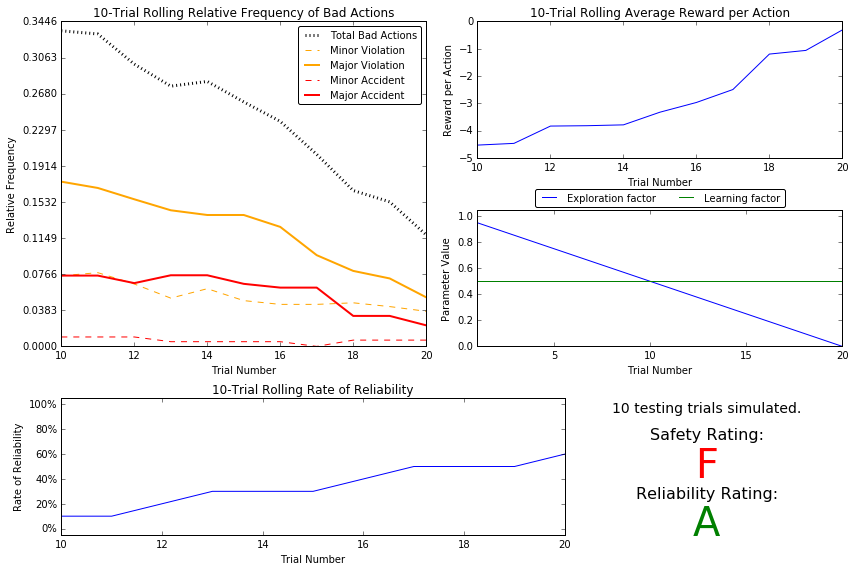

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The default Q-Learning agent has the same safety ranking (F) as the basic driving agent, because the default agent still gets into major accidents after training. The first 10 trials have similar to the basic agent number of bad actions and distribution between those bad actions. However, those numbers drop significantly over the course of training (from ~ 35% to ~11% in total) while the reward grows (from -4 to around 0). Although, it looks like the training was not sufficient and the agent could learn more if we allow more training trials through tuning epsilon parameter (which is represented accurately in the parameters panel). The line corresponding to the total number of bad actions is steadily going down and it looks like it has the potential of going even further down. Though, we are allowed only 20 trials as the functions that determines epsilon decaying is linear and decreases by 0.05 each trial (1.0/0.05 = 20). 

Interestingly, the default Q-Learning agent got A reliability ranking. It means that it did not complete on time only 1 trip out of 10 testing trials. However, the Rolling Rate of Reliability panel shows the same dymanics during training as we saw in the corresponding basic agent's panel. During training both agents were able to complete less than ~60% of all trips, but the default Q-Learning agent was able to learn from those mistakes. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning parameters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

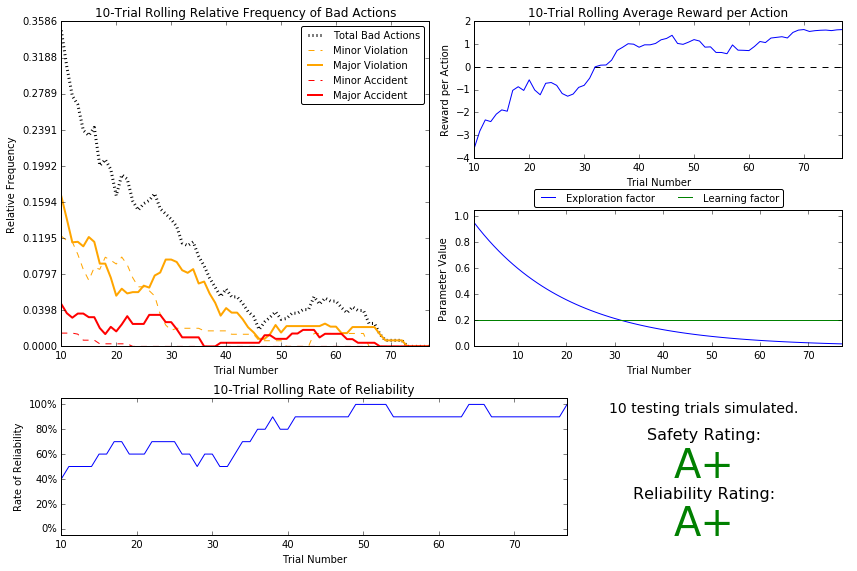

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I used the following decaying function for epsilon:
$$ \epsilon = a^t, \textrm{for } a = 0.95 $$
Together with tolerance equal to 0.02, it gave the agent 77 training trials which were more than enough for the agent to learn the rules. According to the panel that displays frequency of bad actions the total number of bad actions was almost zero at the 70th trial. Also, according to the Rolling Rate of Reliability panel, the agent reached high reliability level somewhere between 40th and 50th trials. The alpha parameter was 0.2 which is quite conservative and does not allow abrupt changes. This combination of settings produces smooth and steady learning dynamics. 

Comparing to the default Q-learning agent, this agent showed a lot of improvements. It learned an approproate policy: it prefers good actions which help to avoid violations and accidents and help to reach the destionation on time. The Safety rating increased from F to A+ and the Reliability rating increased from A to A+. Basically, the agent cannot do better, so I am definitely satisfied with the results. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. As was discussed in the problem statement the optimal policy would represent the U.S. right-of-way traffic laws and  can be successfully captured in a table. There are 96 possible states in the world we defined, so the policy will contain 96 actions for each possible state. Below you can find a table with optimal policy. First 4 columns represent a state (light, waypoint, left traffic, oncoming traffic), fifth column represents the optimal policy and the last column represents the learned policy. From the table you can see that the right-of-way rule holds in the simulated world. The only case when the agent cannot turn right on a red light is when there is left traffic coming forward. There  are also some subtleties to be discussed because some entries may seem problematic. Consider, for example, a case, when the agent wants to turn left on a green light but there is oncoming traffic going forward. In the real world there will be additional regulations regarding this case but in out simplified environment we assume that "the cab will wait for the lane to be clear on a green light, before taking the left turn" (environment.py, line 316). So the optimal action in this case is to turn left.

2. The last column represents the policy that our agent was able to learn. It was constructed from Q-values by choosing the action with the highest rewards for each state. There are 8 states that has not been reached during the training (they are hightlighted yellow and have 'NA' value), to fix this we can try to increase the number of dummy agents increasing the chances of those combinations to appear. There are also 28 states with suboptimal policy (highlighted blue), but none of these actions violate the rules, the agent simply follows waypoint which is different from it's original intention. Considering the fact that the agent has A+ reliability rating, these differences are not critial.

3. The entries that have green color in the last colums demonstrate the optimal policy as they coincide with the fifth column. 

4. Let's consider, for example, the state (green, left, forward, left). The agent intention is to move left but the policy tells him to move forward instead. The corresponding entry in Q-table looks like this:

            ('green', 'left', 'forward', 'left')
             -- forward : 0.34
             -- None : -0.82
             -- right : 0.00
             -- left : 0.00
             
We see that 'forward' is just 0.34 bigger than the optimal 'left' and generally the numbers are quite small. Probably the agent have not visited this state often enough to learn the optimal policy. In opposite, let's consider the entry which correspond to the right-of-way rule (red, right, forward, left):
 
             ('red', 'right', 'forward', 'left')
                 -- forward : -7.97
                 -- None : 0.65
                 -- right : -3.82
                 -- left : -7.99

The magnitude of the rewards is much bigger than in the previous example. The agent will correctly stop instead of turning rigth when he will see a red light and left traffic going forward. 


<table><tr><td><img src="red_right.png"></td><td><img src="green_right.png"></td></tr></table>
<table><tr><td><img src="red_forward.png"></td><td><img src="green_forward.png"></td></tr></table>
<table><tr><td><img src="red_left.png"></td><td><img src="green_left.png"></td></tr></table>

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** 

The objective of the learning in our case is to teach the agent to follow suggested by the planner waypoint and do not violate the traffic rules. Following these conditions ensures that the agent will reach the destination on time as the route planning is performed by separate module which garantees this. This setting corresponds to the real world:  route planning is carried by a navigator and driver should follow the route and obey traffic laws even if a violation will help to reach the destinantion faster. We cannot sacrifice safety, especially when it comes to self-driving cars.

In our simulated world we should get a sequence of **independent** decisions which lead to the destination. The agent should not construct the optimal route, it should only learn to follow the current waypoint. Therefore, adding future rewards can tempt the agent to violate the rules and try to maximaze it's reward in some other way. The only way to maximaze reward should be to obey the rules and to follow the waypoint at the current moment. 

This problem is inherently different from, for example, learning to play chess. In chess the agent should learn to build the optimal sequence of actions, even if some actions in this sequence have negative immediate rewards. That is why we need to introduce future rewards: sometimes we need to take painful actions that we don't like in order to gain more in the long-term run. But in our case we want to build 'hedonistic' agent which always prefers the highest *immediate* ~~gratification~~ reward.

Also, as the destination is changing every new trial, the agent will be forced to start it's learning from scratch every new trial if we will use future rewards.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.